<a href="https://colab.research.google.com/github/maximematerno/DS-Unit-2-Kaggle-Challenge/blob/master/module2/assignment_kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [x] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [x] Continue to participate in our Kaggle challenge.
- [x] Try Ordinal Encoding.
- [x] Try a Random Forest Classifier.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [x] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_






In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module2')

     |████████████████████████████████| 92kB 5.9MB/s 
     |████████████████████████████████| 133kB 16.5MB/s 
     |████████████████████████████████| 7.1MB 46.2MB/s 
     |████████████████████████████████| 614kB 43.7MB/s 
     |████████████████████████████████| 225kB 34.6MB/s 
     |████████████████████████████████| 768kB 36.8MB/s 
     |████████████████████████████████| 194kB 39.6MB/s 
     |████████████████████████████████| 51kB 14.4MB/s 
     |████████████████████████████████| 737kB 38.0MB/s 
     |████████████████████████████████| 51kB 18.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=cdf0fe45977ab9dcdd6e88c08d144e901bcfcd57425d544a539039a1bb515f7e
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=b218dbc4b59b6e212a438c890d1e4f07a4a7ea433f0efbfeff37b35c37f3efdf
  Stored

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [13]:
train, validate = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)
train.shape, validate.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
train.date_recorded = pd.to_datetime(train.date_recorded)

In [0]:
import numpy as np

def clean(X):
    # stop SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'district_code']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # quantity & quantity_group are duplicates
    X = X.drop(columns=['quantity_group', 'installer', 'extraction_type_group', 
                        'extraction_type_class', 'payment_type', 'waterpoint_type_group'])
   

    #convert date_recorded 
    X['date_recorded'] = pd.to_datetime(X.date_recorded)

    X['year_recorded'] = X['date_recorded'].dt.year

    X = X.drop(columns='date_recorded')

    # #create a new feature for pump_age
    X['pump_age'] = X['year_recorded'] - X.construction_year
    
    # # replace negative pump ages with nan 
    # # which also decreased validation accuracy slightly
    X['pump_age'] = X['pump_age'].replace([-7, -6, -5, -4, -3, -2, -1], np.nan)

    # return the wrangled dataframe
    return X

train = clean(train)
val = clean(validate)
test = clean(test)

In [0]:
# The status_group column is the target
target = 'status_group'

X_train = train.drop(columns=target)
y_train = train[target]
X_validate = val.drop(columns=target)
y_validate = val[target]
X_test = test

In [17]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train , score on val 
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_validate,y_validate))

Validation Accuracy 0.8103535353535354


In [18]:
pipeline.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['funder', 'wpt_name', 'basin', 'subvillage', 'region',
                      'lga', 'ward', 'public_meeting', 'recorded_by',
                      'scheme_management', 'scheme_name', 'permit',
                      'extraction_type', 'management', 'management_group',
                      'payment', 'water_quality', 'quality_group', 'quantity',
                      'source', 'source_type', 'source_class',
                      'waterpoint_type'],
                drop_invariant=False, handle_miss...
 river/lake              4
 rainwater harvesting    5
 dam                     6
 other                   7
 NaN                    -2
 dtype: int64},
                         {'col': 'source_class', 'data_type': dtype('O'),
                          'mapping': groundwater    1
 surface        2
 unknown        3
 NaN           -2
 dtype: int64},
                         {'col': 'waterpoint_type', 'data_type': dtype('O'),
                          'ma

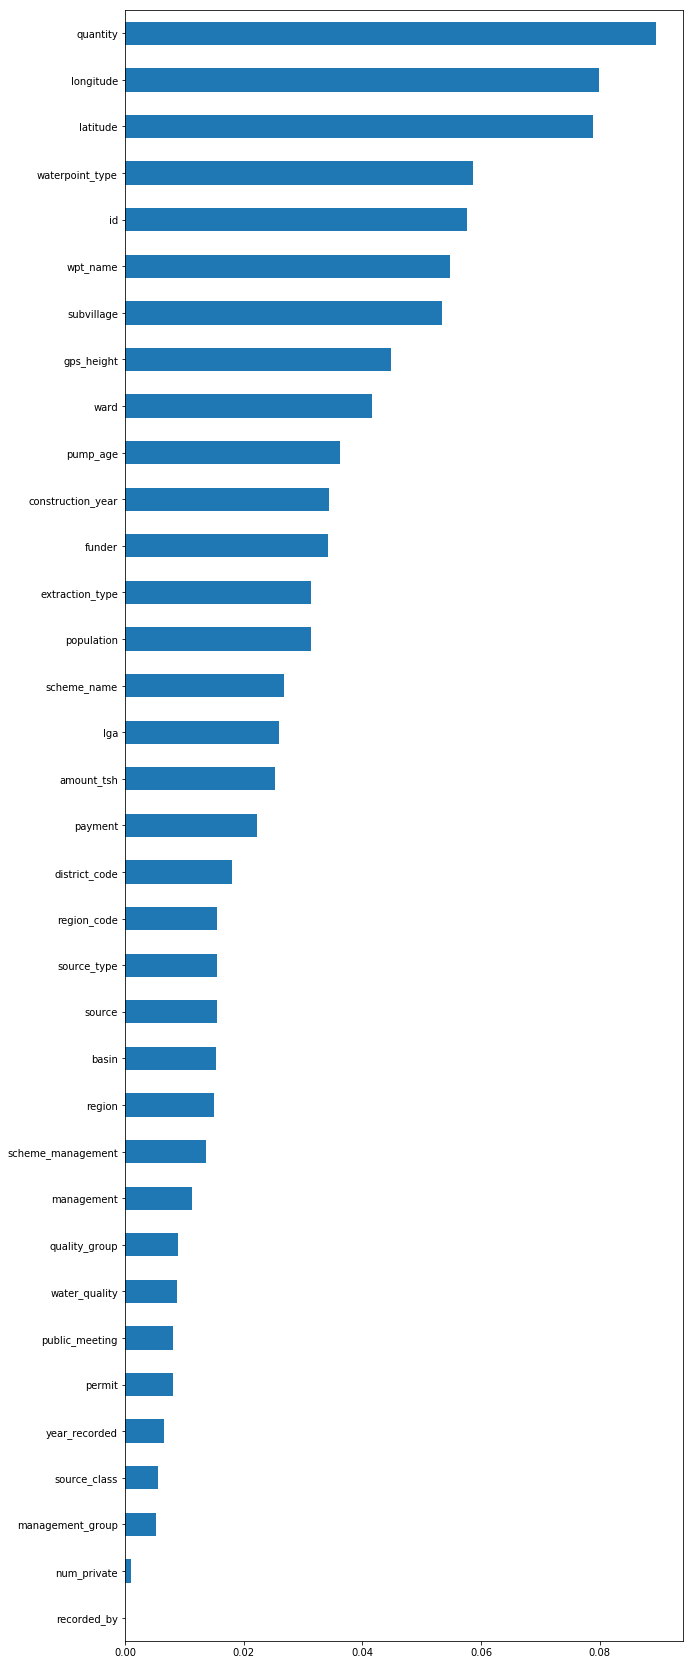

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['randomforestclassifier']

encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [0]:
test_pred = pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = test_pred
submission.to_csv('submission-04.csv', index=False)

In [0]:
if in_colab:
    from google.colab import files
    # Just try again if you get this error:
    # TypeError: Failed to fetch
    # https://github.com/googlecolab/colabtools/issues/337
    files.download('submission-04.csv')